In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns 
from kmodes.kmodes import KModes
from sklearn.preprocessing import StandardScaler

In [2]:
#data_fake_withPredictions.csv
df = pd.read_csv("../../data/data_fake_withPredictions.csv",index_col=0)
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d %H:%M')


In [3]:
df.head()

,date,shops,office_building,industrial_park,fve,mve,wpg,price,isWeekend,isHoliday,...,month_cos,month_sin,1_step_prod,1_step_cons,2_step_prod,2_step_cons,3_step_prod,3_step_cons,4_step_prod,4_step_cons
0,2020-01-01 00:00:00,19.5844,44.6160,16.2360,0.0,297.9020,9.9132,33.2,0,1,...,0.999963,-0.008601,0,0,0,0,0,0,0,0
1,2020-01-01 00:15:00,11.6640,46.3320,18.8452,0.0,323.2966,8.0586,33.2,0,1,...,0.999965,-0.008422,0,0,0,0,0,0,0,0
2,2020-01-01 00:30:00,11.6460,45.9888,14.6196,0.0,263.1303,8.9452,33.2,0,1,...,0.999966,-0.008243,0,0,0,0,0,0,0,0
3,2020-01-01 00:45:00,11.7900,45.9888,14.3676,0.0,262.2852,6.7401,33.2,0,1,...,0.999967,-0.008064,0,0,0,0,0,0,0,0
4,2020-01-01 01:00:00,16.0200,37.6272,23.0252,0.0,265.8654,8.1246,30.4,0,1,...,0.999969,-0.007884,0,0,0,0,0,0,0,0


In [4]:
features =  [
        'price', 'isWeekend', 'isHoliday', 'production_usage',
        'consumption_usage', 'temp', 'wind',
        '1_step_prod','1_step_cons', '2_step_prod', '2_step_cons',
        '3_step_prod','3_step_cons', '4_step_prod', '4_step_cons'
            ]

# scaler = StandardScaler()
# X = scaler.fit_transform(df[features].copy())
# X = pd.DataFrame(X, columns = features)
X = df[features].copy()

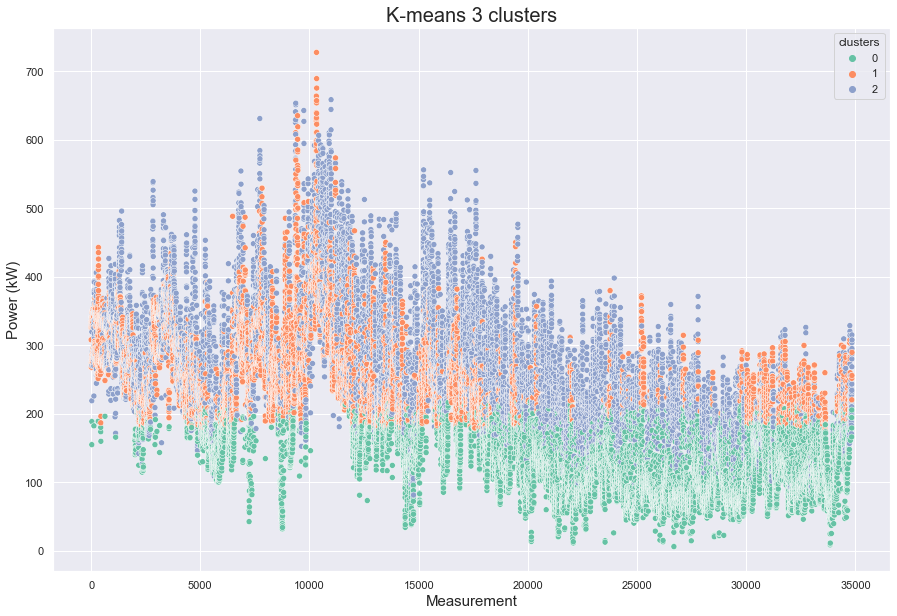

CPU times: user 8.47 s, sys: 5.23 s, total: 13.7 s
Wall time: 2.64 s


In [5]:
%%time
kmeans = KMeans(n_clusters=3)
X['clusters'] = kmeans.fit_predict(X)
df['clusters'] = X['clusters']
df.to_csv("../../data/clustering_Kmeans3.csv",index=0)
sns.set(rc={'figure.figsize':(15,10)})
p  = sns.scatterplot(data=X, y='production_usage', x=X.index,hue='clusters',palette="Set2")
p.set_ylabel("Power (kW)", fontsize = 15)
p.set_xlabel("Measurement", fontsize = 15)
p.set_title("K-means 3 clusters", fontsize=20)
plt.savefig('K-means 3 clusters".png')
plt.show()

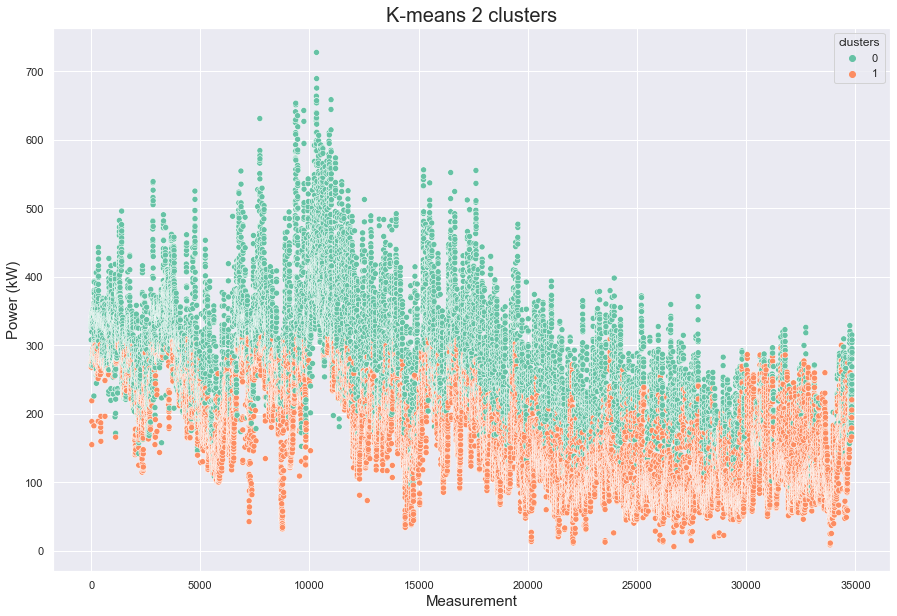

CPU times: user 4.91 s, sys: 3.85 s, total: 8.76 s
Wall time: 1.98 s


In [6]:
%%time
kmeans = KMeans(n_clusters=2)
X['clusters'] = kmeans.fit_predict(X)
df['clusters'] = X['clusters']
df.to_csv("../../data/clustering_Kmeans2.csv",index=0)
sns.set(rc={'figure.figsize':(15,10)})
p  = sns.scatterplot(data=X, y='production_usage', x=X.index,hue='clusters',palette="Set2")
p.set_ylabel("Power (kW)", fontsize = 15)
p.set_xlabel("Measurement", fontsize = 15)
p.set_title("K-means 2 clusters", fontsize=20)
plt.savefig('K-means 2 clusters".png')
plt.show()

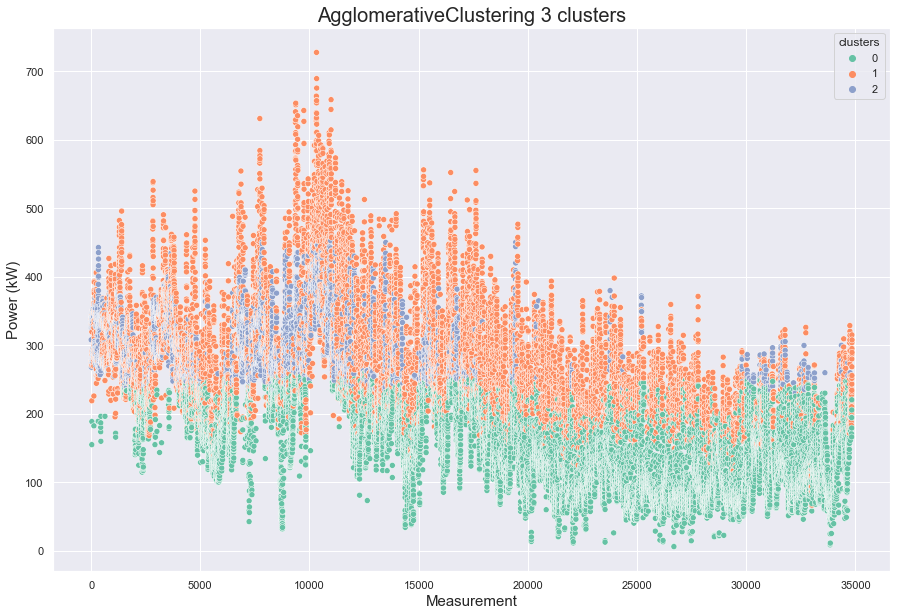

CPU times: user 15.8 s, sys: 1.1 s, total: 16.9 s
Wall time: 16.4 s


In [7]:
%%time

kmeans = AgglomerativeClustering(n_clusters=3)
X['clusters'] = kmeans.fit_predict(X)
df['clusters'] = X['clusters']
df.to_csv("../../data/clustering_aglo3.csv",index=0)
sns.set(rc={'figure.figsize':(15,10)})
p  = sns.scatterplot(data=X, y='production_usage', x=X.index,hue='clusters',palette="Set2")
p.set_ylabel("Power (kW)", fontsize = 15)
p.set_xlabel("Measurement", fontsize = 15)
p.set_title("AgglomerativeClustering 3 clusters", fontsize=20)
plt.savefig('AgglomerativeClustering 3 clusters".png')
plt.show()

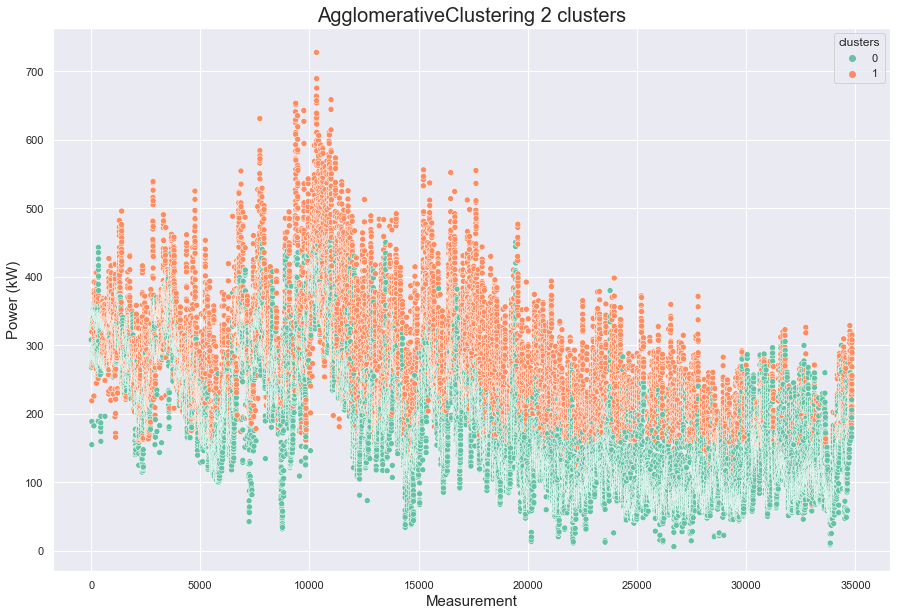

CPU times: user 16.1 s, sys: 1.19 s, total: 17.3 s
Wall time: 16.8 s


In [8]:
%%time

kmeans = AgglomerativeClustering(n_clusters=2)
X['clusters'] = kmeans.fit_predict(X)
df['clusters'] = X['clusters']
df.to_csv("../../data/clustering_aglo2.csv",index=0)
sns.set(rc={'figure.figsize':(15,10)})
p  = sns.scatterplot(data=X, y='production_usage', x=X.index,hue='clusters',palette="Set2")
p.set_ylabel("Power (kW)", fontsize = 15)
p.set_xlabel("Measurement", fontsize = 15)
p.set_title("AgglomerativeClustering 2 clusters", fontsize=20)
plt.savefig('AgglomerativeClustering 2 clusters".png')
plt.show()